In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [214]:
from astropy.table import Table
inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/GALAH_input.hdf5')
data = Table.read('/data/jls/GaiaDR2/spectro/GALAH_distances.hdf5')

In [215]:
print 'Size of catalogues:',len(inputs), len(data)
print 'Successes:',np.count_nonzero(data['flag']==0)

Size of catalogues: 342682 342682
Successes: 264227


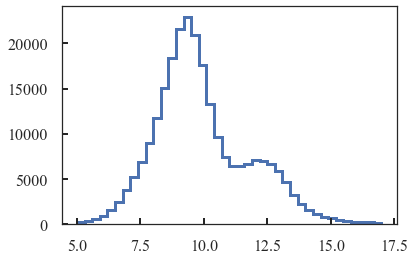

In [176]:
plt.hist(data['dm'],range=[5.,17.],histtype='step',bins=40,lw=3);

In [144]:
def giant(data):
    return data['logg']<(3.8-.5*(data['log10_teff']-3.7))

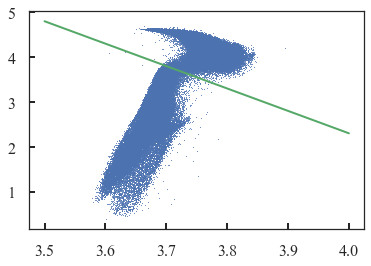

In [143]:
plt.plot(data['log10_teff'],data['logg'],'.',ms=2)
xx = np.linspace(3.5,4.)
plt.plot(xx,-5.*(xx-3.7)+3.8)

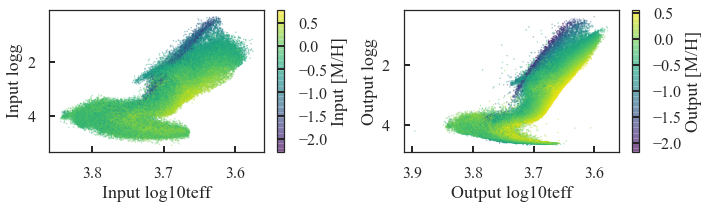

In [177]:
f,a=plt.subplots(1,2,figsize=[10.,3.])
plt.sca(a[0])
plt.scatter(np.log10(inputs['teff']),inputs['logg'],c=inputs['fe_h'],s=1,cmap=plt.cm.viridis, alpha=0.3);
plt.xlabel('Input log10teff')
plt.ylabel('Input logg')
plt.colorbar(label='Input [M/H]')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.sca(a[1])
plt.scatter(data['log10_teff'],data['logg'],c=data['Z'],s=1,cmap=plt.cm.viridis, alpha=0.3);
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel('Output log10teff')
plt.ylabel('Output logg')
plt.colorbar(label='Output [M/H]')
plt.tight_layout()

In [ ]:
f,a=plt.subplots(1,2,figsize=[10.,4.])
plt.sca(a[0])
plt.hexbin(data['l'],data['b'],C=np.power(10.,data['log10_age']),
           cmap=plt.cm.viridis,vmin=2.,vmax=10.,gridsize=60);
plt.colorbar(label='Age')

plt.sca(a[1])
plt.hexbin(data['l'],data['b'],C=np.power(10.,data['log10_av']),
            cmap=plt.cm.viridis,alpha=1,vmin=0.,vmax=1.,gridsize=70);
plt.colorbar(label=r'$A_V$')

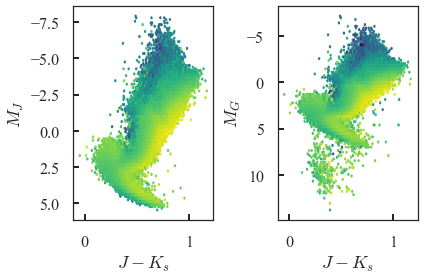

In [116]:
f,a=plt.subplots(1,2)
plt.sca(a[0])
plt.hexbin(inputs.J-inputs.K-np.power(10.,data['log10_av'])*0.158,
           inputs.J-data['dm']-np.power(10.,data['log10_av'])*0.211,
          C=data['Z'],cmap=plt.cm.viridis)
plt.gca().invert_yaxis()
plt.xlabel(r'$J-K_s$')
plt.ylabel(r'$M_J$')

plt.sca(a[1])
plt.hexbin(inputs.J-inputs.K-np.power(10.,data['log10_av'])*0.158,
         inputs.G-data['dm']-np.power(10.,data['log10_av'])*0.77,
          C=data['Z'],cmap=plt.cm.viridis)
plt.xlabel(r'$J-K_s$')
plt.ylabel(r'$M_G$')
plt.gca().invert_yaxis()
plt.tight_layout()

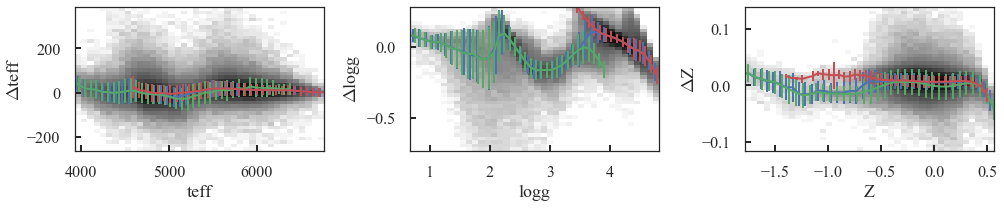

In [147]:
from matplotlib.colors import LogNorm
from plotting_general import running_median
f,a=plt.subplots(1,3,figsize=[14.,3.])
plim=[0.1,99.9]
data['teff']=np.power(10.,data['log10_teff'])
for i,(t,t2) in enumerate(zip(['teff', 'logg', 'Z'],['teff','logg','fe_h'])):
    plt.sca(a[i])
#     plt.hexbin(inputs[t2],data[t]-inputs[t2],C=inputs['e_'+t2],
#                vmin=np.nanpercentile(inputs['e_'+t2],0.5),vmax=np.nanpercentile(inputs['e_'+t2],99.5))
    plt.hist2d(inputs[t2],data[t]-inputs[t2],
              range=[np.nanpercentile(inputs[t2],plim),np.nanpercentile(data[t]-inputs[t2],plim)],
              bins=40,norm=LogNorm())
    r = running_median(inputs[t2],data[t]-inputs[t2],nbins=40,percentiles=plim)
    plt.errorbar(r[0],r[1],.5*(r[3]-r[2]))
    r = running_median(inputs[t2][giant(data)],(data[t]-inputs[t2])[giant(data)],
                       nbins=40,percentiles=plim)
    plt.errorbar(r[0],r[1],.5*(r[3]-r[2]))
    r = running_median(inputs[t2][~giant(data)],(data[t]-inputs[t2])[~giant(data)],
                       nbins=40,percentiles=plim)
    plt.errorbar(r[0],r[1],.5*(r[3]-r[2]))
    plt.ylim(*np.nanpercentile(data[t]-inputs[t2],plim))
    plt.xlabel(t)
    plt.ylabel(r'$\Delta$'+t)
plt.tight_layout()

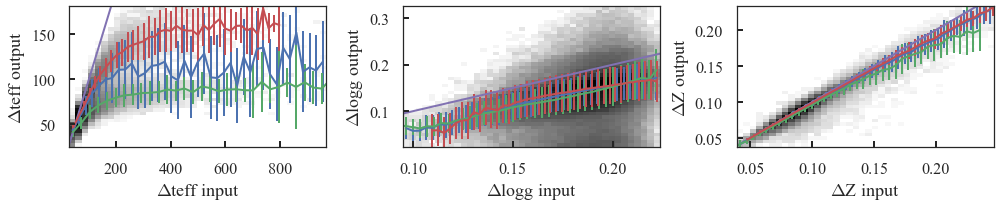

In [193]:
from matplotlib.colors import LogNorm
from plotting_general import running_median
f,a=plt.subplots(1,3,figsize=[14.,3.])
plim=[0.1,99.9]
data['teff']=np.power(10.,data['log10_teff'])
data['teff_err']=np.power(10.,data['log10_teff'])*data['log10_teff_err']*np.log(10.)
for i,(t,t2) in enumerate(zip(['teff', 'logg', 'Z'],['teff','logg','fe_h'])):
    plt.sca(a[i])
    plt.hist2d(inputs['e_'+t2],data[t+'_err'],
              range=[np.nanpercentile(inputs['e_'+t2],plim),
                     np.nanpercentile(data[t+'_err'],plim)],
              bins=40,norm=LogNorm())
    r = running_median(inputs['e_'+t2],data[t+'_err'],nbins=40,percentiles=plim)
    plt.errorbar(r[0],r[1],.5*(r[3]-r[2]))
    r = running_median(inputs['e_'+t2][giant(data)],data[t+'_err'][giant(data)],
                       nbins=40,percentiles=plim)
    plt.errorbar(r[0],r[1],.5*(r[3]-r[2]))
    r = running_median(inputs['e_'+t2][~giant(data)],data[t+'_err'][~giant(data)],
                       nbins=40,percentiles=plim)
    plt.errorbar(r[0],r[1],.5*(r[3]-r[2]))
    plt.ylim(*np.nanpercentile(data[t+'_err'],plim))
    xx = np.linspace(np.nanpercentile(inputs['e_'+t2],plim)[0],
                     np.nanpercentile(inputs['e_'+t2],plim)[1],
                     50)
    plt.plot(xx,xx)
    plt.xlabel(r'$\Delta$'+t+' input')
    plt.ylabel(r'$\Delta$'+t+' output')
plt.tight_layout()

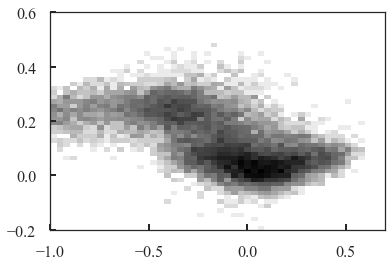

In [202]:
plt.hist2d(inputs['fe_h'][data['log10_age']<np.log10(2.)],
           inputs['alpha_fe'][data['log10_age']<np.log10(2.)],
           norm=LogNorm(),range=[[-1.,0.7],[-0.2,0.6]],bins=50);

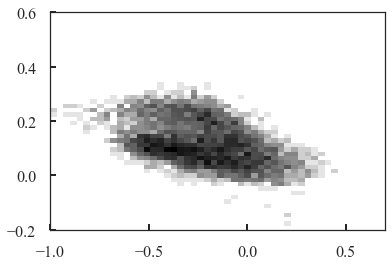

In [200]:
plt.hist2d(inputs['fe_h'][data['log10_age']>np.log10(9.)],
           inputs['alpha_fe'][data['log10_age']>np.log10(9.)],
           norm=LogNorm(),range=[[-1.,0.7],[-0.2,0.6]],bins=50);

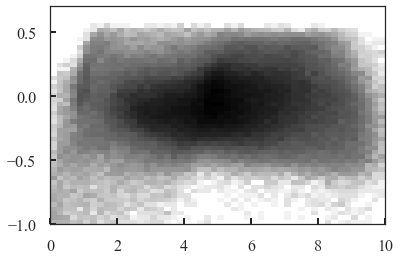

In [207]:
plt.hist2d(np.power(10.,data['log10_age']),data['Z'],
           norm=LogNorm(),range=[[0.,10.],[-1.,0.7]],bins=50);

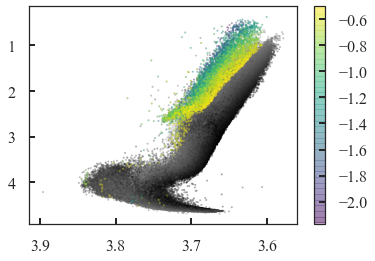

In [213]:
fltr = (data['Z']<-0.5)&(data['log10_age']<np.log10(4.))

plt.scatter(data['log10_teff'],data['logg'],c=data['Z'],s=2,alpha=0.3)

plt.scatter(data['log10_teff'][fltr],data['logg'][fltr],c=data['Z'][fltr],s=2,alpha=0.3,cmap=plt.cm.viridis)
plt.colorbar()
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()